# Image Denoising using Average and Median

In [149]:
import numpy as np
import matplotlib.pyplot as pl
import imageio as io

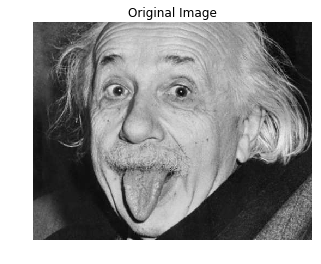

In [150]:
# load 2D image
I = io.imread('./data/einstein.png')
# show image
pl.figure()
pl.imshow(I, cmap='gray'), pl.axis('off')
pl.title('Original Image');

In [151]:
def speckle_noise(I, D=0.05):
    """
    This function adds "Salt & Pepper" noise to the image I, where D is the noise density.
    This affects approximately D*I.size pixels. The default for D is 0.05.
    """
    I = I.copy()
    height, width = I.shape
    linear_index = np.arange(height*width)
    np.random.shuffle(linear_index)
    np.random.shuffle(linear_index)
    linear_index = linear_index[:np.int(D*height*width)]
    array_index = np.unravel_index(linear_index, I.shape)
    I[array_index] = (I[array_index] < 127) * 255 + (I[array_index] >= 127) * 0
    return I

In [152]:
def denoise(I, n=3):
    """
    This function denoises the image I by replacing each pixel value with 
    Average and Median of its nxn neighbours.
    """
    I_median = I.copy()
    I_average = I.copy()
    height, width = I.shape
    n_half = np.int(n/2)
    for i in np.arange(n_half, height-n_half):
        for j in np.arange(n_half, width-n_half):
            I_median[i,j] = np.median(I[i-n_half:i+n_half+1, j-n_half:j+n_half+1])
            I_average[i,j] = np.mean(I[i-n_half:i+n_half+1, j-n_half:j+n_half+1].astype(np.float))
    return (I_average, I_median)
            

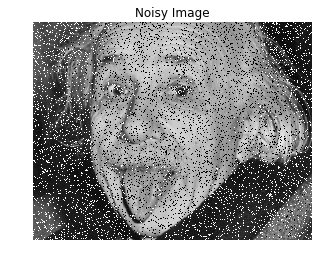

In [153]:
# add "Salt & Pepper" noise to the image I
I_noise = speckle_noise(I, D=0.1)
# show noisy image
pl.figure()
pl.imshow(I_noise, cmap='gray'), pl.axis('off')
pl.title('Noisy Image');

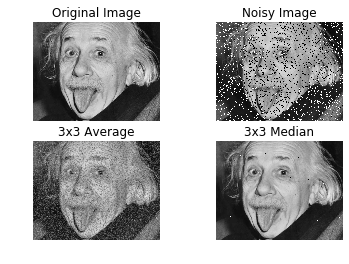

In [154]:
n = 3
(I_average, I_median) = denoise(I_noise, n=n)

fig, axes = pl.subplots(2,2)
axes[0,0].imshow(I, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('Off')
axes[0,1].imshow(I_noise, cmap='gray')
axes[0,1].set_title('Noisy Image')
axes[0,1].axis('Off')
axes[1,0].imshow(I_average, cmap='gray')
axes[1,0].set_title('{:d}x{:d} Average'.format(n,n))
axes[1,0].axis('Off')
axes[1,1].imshow(I_median, cmap='gray')
axes[1,1].set_title('{:d}x{:d} Median'.format(n,n))
axes[1,1].axis('Off')
io.imwrite('../slides/docs/denoising_original.png', I)
io.imwrite('../slides/docs/denoising_noisy.png', I_noise)
io.imwrite('../slides/docs/denoising_average{:d}x{:d}.png'.format(n,n), I_average)
io.imwrite('../slides/docs/denoising_median{:d}x{:d}.png'.format(n,n), I_median)

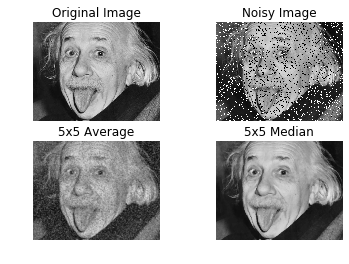

In [155]:
n = 5
(I_average, I_median) = denoise(I_noise, n=n)

fig, axes = pl.subplots(2,2)
axes[0,0].imshow(I, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('Off')
axes[0,1].imshow(I_noise, cmap='gray')
axes[0,1].set_title('Noisy Image')
axes[0,1].axis('Off')
axes[1,0].imshow(I_average, cmap='gray')
axes[1,0].set_title('{:d}x{:d} Average'.format(n,n))
axes[1,0].axis('Off')
axes[1,1].imshow(I_median, cmap='gray')
axes[1,1].set_title('{:d}x{:d} Median'.format(n,n))
axes[1,1].axis('Off')
io.imwrite('../slides/docs/denoising_original.png', I)
io.imwrite('../slides/docs/denoising_noisy.png', I_noise)
io.imwrite('../slides/docs/denoising_average{:d}x{:d}.png'.format(n,n), I_average)
io.imwrite('../slides/docs/denoising_median{:d}x{:d}.png'.format(n,n), I_median)

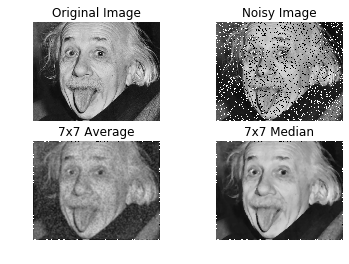

In [156]:
n = 7
(I_average, I_median) = denoise(I_noise, n=n)

fig, axes = pl.subplots(2,2)
axes[0,0].imshow(I, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('Off')
axes[0,1].imshow(I_noise, cmap='gray')
axes[0,1].set_title('Noisy Image')
axes[0,1].axis('Off')
axes[1,0].imshow(I_average, cmap='gray')
axes[1,0].set_title('{:d}x{:d} Average'.format(n,n))
axes[1,0].axis('Off')
axes[1,1].imshow(I_median, cmap='gray')
axes[1,1].set_title('{:d}x{:d} Median'.format(n,n))
axes[1,1].axis('Off')
io.imwrite('../slides/docs/denoising_original.png', I)
io.imwrite('../slides/docs/denoising_noisy.png', I_noise)
io.imwrite('../slides/docs/denoising_average{:d}x{:d}.png'.format(n,n), I_average)
io.imwrite('../slides/docs/denoising_median{:d}x{:d}.png'.format(n,n), I_median)

# Image as High-dimensional Data

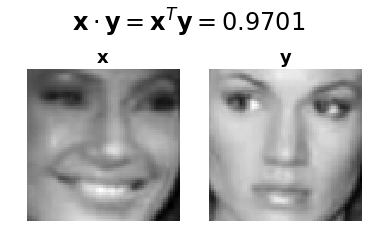

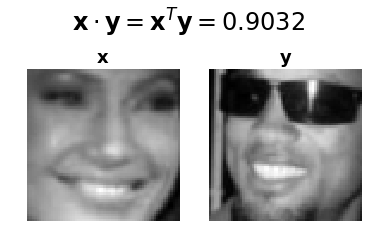

In [225]:
# load image
I1 = io.imread('./data/Jennifer_Lopez_0001.pgm').astype(np.float)
# vectorize 2D image
I1_column = np.reshape(I1, (I1.shape[0]*I1.shape[1], 1))
# normalize image
I1_column = I1_column / np.sqrt(np.sum(I1_column**2))

I2 = io.imread('./data/Jennifer_Lopez_0020.pgm').astype(np.float)
# vectorize 2D image
I2_column = np.reshape(I2, (I2.shape[0]*I2.shape[1], 1))
# normalize image
I2_column = I2_column / np.sqrt(np.sum(I2_column**2))

I3 = io.imread('./data/Will_Smith_0002.pgm').astype(np.float)
# vectorize 2D image
I3_column = np.reshape(I3, (I3.shape[0]*I3.shape[1], 1))
# normalize image
I3_column = I3_column / np.sqrt(np.sum(I3_column**2))

fig, axes = pl.subplots(1,2)
axes[0].imshow(I1, cmap='gray')
axes[0].set_title(r'$\mathbf{x}$', fontsize=18)
axes[0].axis('Off')
axes[1].imshow(I2, cmap='gray')
axes[1].set_title(r'$\mathbf{y}$', fontsize=18)
axes[1].axis('Off')

xy = np.sum(I1_column * I2_column)
msg = '$\mathbf{{x}} \cdot \mathbf{{y}} = \mathbf{{x}}^{{T}} \mathbf{{y}} = {:.4f}$'.format(xy)
fig.suptitle(msg, fontsize=24)
fig.savefig('../slides/docs/image_similarity1.png', transparent=True, dpi=300, bbox_inches="tight")

fig, axes = pl.subplots(1,2)
axes[0].imshow(I1, cmap='gray')
axes[0].set_title(r'$\mathbf{x}$', fontsize=18)
axes[0].axis('Off')
axes[1].imshow(I3, cmap='gray')
axes[1].set_title(r'$\mathbf{y}$', fontsize=18)
axes[1].axis('Off')

xy = np.sum(I1_column * I3_column)
msg = '$\mathbf{{x}} \cdot \mathbf{{y}} = \mathbf{{x}}^{{T}} \mathbf{{y}} = {:.4f}$'.format(xy)
fig.suptitle(msg, fontsize=24)
fig.savefig('../slides/docs/image_similarity2.png', transparent=True, dpi=300, bbox_inches="tight")


# Generating Points Uniformly at Random from a 2D Unit Ball

C:\ProgramData\Anaconda3.7\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


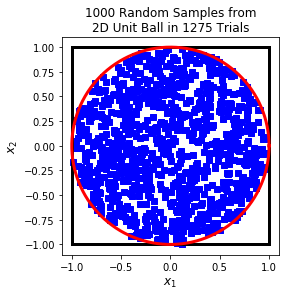

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as pl
import matplotlib as mpl

# set seed value for random number generator
seed = 7
np.random.seed(seed)
# number of random points
n = 1000
n_s = 0
n_t = 0
# place holders for coordinates
X1 = np.zeros(n, dtype=np.float)
X2 = np.zeros(n, dtype=np.float)
while n_s != n:
    # first coordinate
    x1 = 2 * np.random.rand() - 1
    # second coordinate
    x2 = 2 * np.random.rand() - 1
    # compute r
    r = np.sqrt(x1**2 + x2**2)
    # if r<=1.0 add it into the coordinate place holdes
    if r <= 1.0:
        X1[n_s] = x1
        X2[n_s] = x2
        n_s = n_s + 1
    n_t = n_t + 1

# for drawing unitball
x_u = np.zeros(n)
y_u = np.zeros(n)
theta_u = np.linspace(0, 2 * np.pi, 1000)
r_u = 1.0
x_u = r_u * np.cos(theta_u)
y_u = r_u * np.sin(theta_u)


fontsize = 12  
linewidth = 3
pl.figure()
# draw sampled points
pl.scatter(X1, X2, c='b', marker = 's', s=32)
# draw unit square
pl.plot(np.linspace(-1, 1, n), np.ones(n), c='k', linewidth=linewidth)
pl.plot(np.linspace(-1, 1, n), -1 * np.ones(n), c='k', linewidth=linewidth)
pl.plot(np.ones(n), np.linspace(-1, 1, n), c='k', linewidth=linewidth)
pl.plot(-1 * np.ones(n), np.linspace(-1, 1, n), c='k', linewidth=linewidth)
# draw unit ball boundaries
pl.plot(x_u, y_u, c='r', linewidth=linewidth)
pl.title(str(n) + ' Random Samples from\n2D Unit Ball in ' + str(n_t) + ' Trials', fontsize=fontsize)
pl.xlabel(r'$x_{1}$', fontsize=fontsize)
pl.ylabel(r'$x_{2}$', fontsize=fontsize)
pl.axes().set_aspect('equal')
name = 'samples_from_2D_unit_ball_' + str(n) + '_samples.png'
pl.savefig(name, transparent=True, dpi=300, bbox_inches="tight")

In [3]:
1000/n_t*4

3.1372549019607843

# Generating Points Uniformly at Random from a 3D Unit Ball

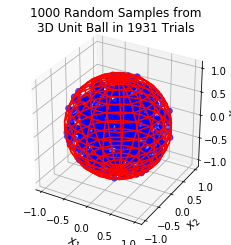

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pl
import numpy as np

# set seed value for random number generator
seed = 7
np.random.seed(seed)
# number of random points
n = 1000
n_s = 0
n_t = 0
# place holders for coordinates
X1 = np.zeros(n, dtype=np.float)
X2 = np.zeros(n, dtype=np.float)
X3 = np.zeros(n, dtype=np.float)
while n_s != n:
    # first coordinate
    x1 = 2 * np.random.rand() - 1
    # second coordinate
    x2 = 2 * np.random.rand() - 1
    # third coordinate
    x3 = 2 * np.random.rand() - 1
    # compute r
    r = np.sqrt(x1**2 + x2**2 + x3**2)
    # if r<=1.0 add it into the coordinate place holdes
    if r <= 1.0:
        X1[n_s] = x1
        X2[n_s] = x2
        X3[n_s] = x3
        n_s = n_s + 1
    n_t = n_t + 1
    

fontsize = 12  
fig = pl.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
# draw sampled points
ax.scatter(X1, X2, X3, color='b', marker = 'o', s=32)
# for drawing sphere in 3D
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")
ax.set_title(str(n) + ' Random Samples from\n3D Unit Ball in ' + str(n_t) + ' Trials', fontsize=fontsize)
ax.set_xlabel(r'$x_{1}$', fontsize=fontsize)
ax.set_ylabel(r'$x_{2}$', fontsize=fontsize)
ax.set_zlabel(r'$x_{3}$', fontsize=fontsize)

name = '../slides/docs/samples_from_3D_unit_ball_' + str(n) + '_samples.png'
pl.savefig(name, transparent=True, dpi=300, bbox_inches="tight")

# Samples from d-Dimensional Unit Ball

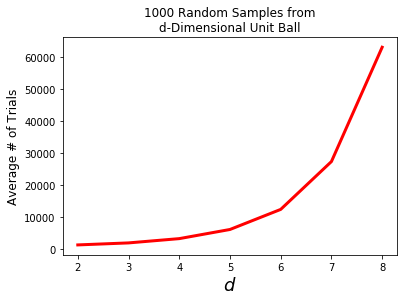

In [36]:
import matplotlib.pyplot as pl
import numpy as np

# set seed value for random number generator
seed = 7
np.random.seed(seed)
# number of random points
n = 1000
n_r_m = 30
D = 9
n_trials = np.zeros(D-2)
for d in np.arange(2, D):    
    n_r = 0
    while n_r < n_r_m:
        n_t = 0
        n_s = 0
        while n_s != n:
            x = 2*np.random.rand(d) - 1
            # compute r
            r = np.sqrt(np.sum(x**2))
            # if r<=1.0 add it into the coordinate place holdes
            if r <= 1.0:
                n_s = n_s + 1
            n_t = n_t + 1
        n_trials[d-2] = n_trials[d-2] + n_t
        n_r = n_r + 1
    #np.disp(d)
n_trials = n_trials / n_r_m    

linewidth = 3
fontsize = 12  
pl.close('all')
pl.figure()
pl.plot(np.arange(2, D), n_trials, c='r', linewidth=linewidth)
pl.xlabel(r'$d$', fontsize = 18)
pl.ylabel(r'Average # of Trials', fontsize=fontsize)
pl.title(str(n) + ' Random Samples from\nd-Dimensional Unit Ball', fontsize=fontsize)
name = '../slides/docs/samples_from_dD_unit_ball_' + str(n) + '_samples.png'
pl.savefig(name)

# Generating Random Numbers According to a Given Probability Distribution

Suppose one wanted to generate a random variable with probability density $p(x)$ where $p(x)$ is continuous. Let $P(x)$ be the cumulative distribution function for $x$ and let $u$ be a random variable with uniform probability density over the interval $[0,1]$. Then the random variable $x=P^{-1}(u)$ has probability density $p(x)$.

## Random Samples from the Standard Cauchy Probability Density Function

Suppose we would like to generate samples according to Cauchy probability density function
\begin{equation}
\nonumber
p(x) = \frac{1}{s \pi (1 + ((x-t)/s)^2)},
\end{equation}
where $t$ is the location parameter and $s$ is the scale parameter. The case where $t = 0$ and $s=1$ is called the standard Cauchy distribution. The equation for the standard Cauchy probability density function reduces to
\begin{equation}
\nonumber
p(x) = \frac{1}{\pi (1+x^{2})}.
\end{equation}

For the standard Cauchy probability density function, the cumulative distribution function $P(x)$ for $x$ is
\begin{equation}
\nonumber
P(x) = \int\limits_{t=-\infty}^{x} p(t) dt = \int\limits_{t=-\infty}^{x} \frac{1}{\pi} \frac{1}{1+t^{2}} dt = \frac{1}{2} + \frac{1}{\pi} \tan^{-1}(x).
\end{equation}

Setting $u=P(x)$ and solving for $x$ yields $x = \tan(\pi(u-\frac{1}{2}))$. Thus, to generate a random number $x\geq0$ using the Cauchy distribution, generate $u \in [0,1]$, uniformly and calculate $x = \tan(\pi(u-\frac{1}{2}))$. The value of $x$ varies from $-\infty$ to $\infty$ with $P(0) = 1/2$.

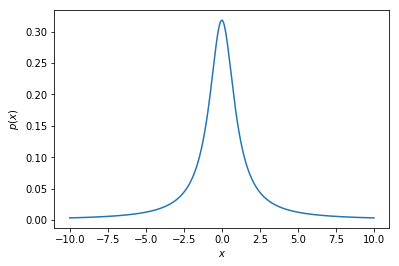

In [147]:
import numpy as np
import matplotlib.pyplot as pl

x = np.linspace(-10, 10, 10000)
p = 1.0 / (np.pi*(1+x**2))

pl.figure()
pl.plot(x, p)
pl.xlabel('$x$')
pl.ylabel('$p(x)$')
pl.savefig('./cauchy.png', dpi=300)

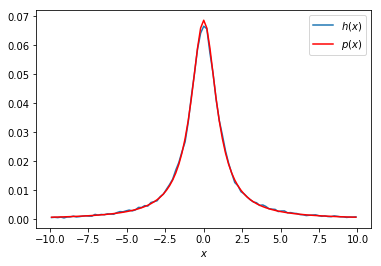

In [183]:
np.random.seed(7)
number_of_samples = 50000
u = np.random.rand(number_of_samples)
x = np.tan(np.pi*(u-0.5))
x_range = np.linspace(-10, 10, 100);
h, e = np.histogram(x, bins=x_range)
h = h / np.sum(h)
c = np.array([(e[i]+e[i+1])/2.0 for i in np.arange(e.shape[0]-1)])
p = 1.0 / (np.pi*(1+c**2))
p = p / np.sum(p)
pl.plot(c, h, label='$h(x)$');
pl.xlabel('$x$')
pl.plot(c, p, color='red', label='$p(x)$')
pl.legend();

## Triangular Probability Density Function

## Random Samples from a Triangular Distribution

Suppose we would like to generate a random sample $x$ from a probability distribution function:

\begin{equation}
p(x) = \left\{
\begin{array}{rl}
x - 1 & \text{for } 1 \leq x < 2; \\
-x + 3 & \text{for } 2 \leq x \leq 3; \\
0 & \text{otherwise}.
\end{array}
\right.
\end{equation}

The cumulative distribution function $P(x)$ for $x$ is

\begin{equation}
P(x) = \int\limits_{t=-\infty}^{x} p(t) dt =
\left\{
\begin{array}{rl}
\frac{x^{2}}{2} - x + \frac{1}{2} & \text{for } 1 \leq x < 2; \\
\frac{1}{2}+\left(-\frac{x^{2}}{2} + 3 x -4\right) & \text{for } 2 \leq x \leq 3.
\end{array}
\right.
\end{equation}

Setting $u=P(x)$ and solving for $x$ yields

\begin{equation}
x = P^{-1}\left(u\right) =
\left\{
\begin{array}{rl}
1+\sqrt{2 u} & \text{for } 0 \leq u < \frac{1}{2}; \\
3-\sqrt{2-2u} & \text{for } \frac{1}{2} \leq u \leq 1 .
\end{array}
\right.
\end{equation}


Thus, to generate a random number $x$ using the Triangular distribution, generate $u \in [0,1]$ uniformly and calculate $x =1+\sqrt{2 u}$ if $0 \leq u < \frac{1}{2}$ and $x =3-\sqrt{2-2u}$ if $\frac{1}{2} \leq u < 1$. The value of $x$ varies from $1$ to $3$ with $P(2) = 1/2$.

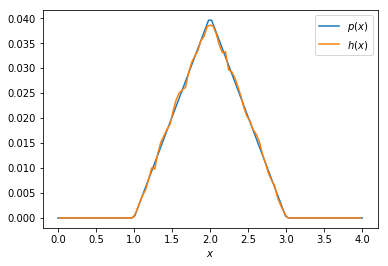

In [186]:
np.random.seed(7)
number_of_samples = 50000
u = np.random.rand(number_of_samples)
i_l = np.where(u<0.5)
i_h = np.where(u>=0.5)
x = np.zeros(number_of_samples)
x[i_l] = 1 + np.sqrt(2*u[i_l])
x[i_h] = 3 - np.sqrt(2-2*u[i_h])
x_range = np.linspace(0, 4, 100);
h, e = np.histogram(x, bins=x_range)
h = h / np.sum(h)
c = np.array([(e[i]+e[i+1])/2.0 for i in np.arange(e.shape[0]-1)])

p = np.zeros(x_range.shape)
for i,x in enumerate(x_range):
    if (1.0 <= x < 2.0):
        p[i] = (x-1.0)
    elif (2.0 <= x <=3.0):
        p[i] = (-x+3.0)
p = p / np.sum(p)
pl.plot(x_range, p, label='$p(x)$')
pl.xlabel('$x$')
pl.plot(c, h, label='$h(x)$')
pl.xlabel('$x$');
pl.legend();